<a href="https://colab.research.google.com/github/KimJunGu9/ADP_basic/blob/main/4_4_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EC%8B%9C%EA%B0%81%ED%99%94(%ED%9E%88%ED%8A%B8%EB%A7%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 상관관계 시각화(히트맵)

# 두 변수 간의 관계의 정도
# 두 확률변수가 함께 변화하는지의 정도를 측정하는 값

# 단점: 측정 단위 크기를 반영하지 못해 절대적인 상관성의 정도를 파악하기 어려움
# 단점 극복: 공분산을 두 변수의 표준편차 곱으로 나누어 표준화시킴 (= 상관계수)

In [2]:
# 가. 피어슨 상관계수

# 두 연속형 자료가 모두 정규성을 따른다는 가정
# 선형적 상관관계를 측정
# -1부터 1사이의 값

# 판다스 사용 시	corr(method='pearson')
# 싸이파이 사용 시	stats.pearsonr(df1, df2)

In [3]:
# 나. 스피어만 상관계수

# 두 변수가 정규성을 만족하지 않거나, 변수가 순위 및 순서 형태로 주어지는 경우
# 비모수적 방법 (데이터에 순위를 매긴 후 그 순위에 대한 상관계수를 산출함. 실제값 이용 X)
# -1부터 1사이의 값
# 비선형관계의 연관성 파악 가능
# 연속형, 이산형, 순서형 자료에 적용 가능

# 판다스 사용 시	corr(method='spearman')
# 싸이파이 사용 시	stats.spearmanr(df1, df2)

In [4]:
# 다. 켄달의 순위상관계수

# 데이터가 순서쌍(Xi, Yi)로 주어졌을 때
# Xi가 커짐에 따라 Yi도 커질 경우: 부합
# Xi가 커짐에 따라 Yi가 작아질 경우: 비부합
# 전체 데이터에서 비부합상에 대한 부합쌍의 비율로 상관계수를 산출함
# -1부터 1사이의 값
# 순위상관계수가 1일 경우: 부합쌍의 비율이 100%
# 순위상관계수가 -1일 경우: 비부합쌍의 비율이 100%
# 순위상관계수가 0일 경우: 두 변수 X와 Y는 상관성이 없음

# 판다스 사용 시	corr(method='kendall')
# 싸이파이 사용 시	stats.kendalltau(df1, df2)

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
air = pd.read_csv('/content/drive/MyDrive/ADP/Part.1/2.데이터_핸들링/data/airquality.csv')

In [29]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [30]:
air = air.iloc[:,:4]
air

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56
...,...,...,...,...
148,30.0,193.0,6.9,70
149,NaN,145.0,13.2,77
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


In [31]:
air_cor = air.corr(method='pearson')
air_cor

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.698360,0.275840,-0.457988,1.000000


In [32]:
# 히트맵

# sns.heatmap(df,
#            xticklabels = df.columns,
#            yticklabels = df.columns,
#            cmap='RdBu_r',
#            annot=True,  # True: 상관계수 텍스트로 보이게 해줌
#            linewidth=0.5)

In [33]:
air_cor.style.background_gradient(cmap='coolwarm')

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.698360,0.275840,-0.457988,1.000000


<Axes: >

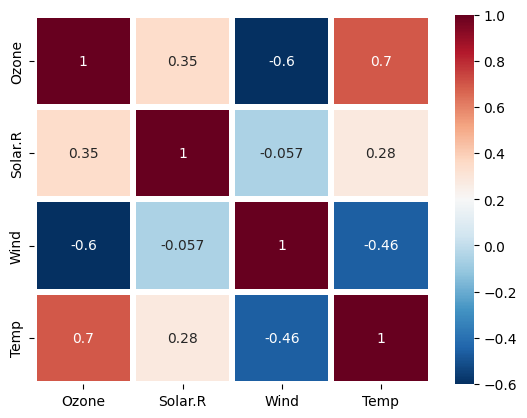

In [34]:
sns.heatmap(air_cor,
           xticklabels = air_cor.columns,
           yticklabels = air_cor.columns,
           cmap='RdBu_r',
           annot=True, 
           linewidth=3)

In [35]:
# 산점도 행렬
# 두 개 이상의 변수가 있는 데이터에서 변수들 간의 산점도를 그린 그래프

# 여러 변수들 간의 산점도를 한 번에 볼 수 있도록 표현하여 변수들 간의 상관관계를 비교할 수 있음

# <seaborn의 pairplot>

# seaborn.pairplot(data, hue=None, kind='scatter', diag_kind='auto', markers=None, dropna=False, corner=True)

# data : pandas.DataFrame
# hue : 데이터의 범주형 변수. 집단을 색으로 구분해서 플롯을 그려줌
# kind : 'scatter'(산점도), 'kde'(밀도그래프), 'hist'(히스토그램), 'reg'(회귀선)로 구성.
# diag_kind : 'auto', 'hist', 'kde', None으로 구성
# markers : 마커 코드
# corner : True로 할 경우 세모 모양 상관계수 그래프 (디폴트는 False)

In [36]:
iris = pd.read_csv('/content/drive/MyDrive/ADP/Part.1/새 폴더/2. 데이터 핸들링/2.1.DataFrame 기본/example.csv')

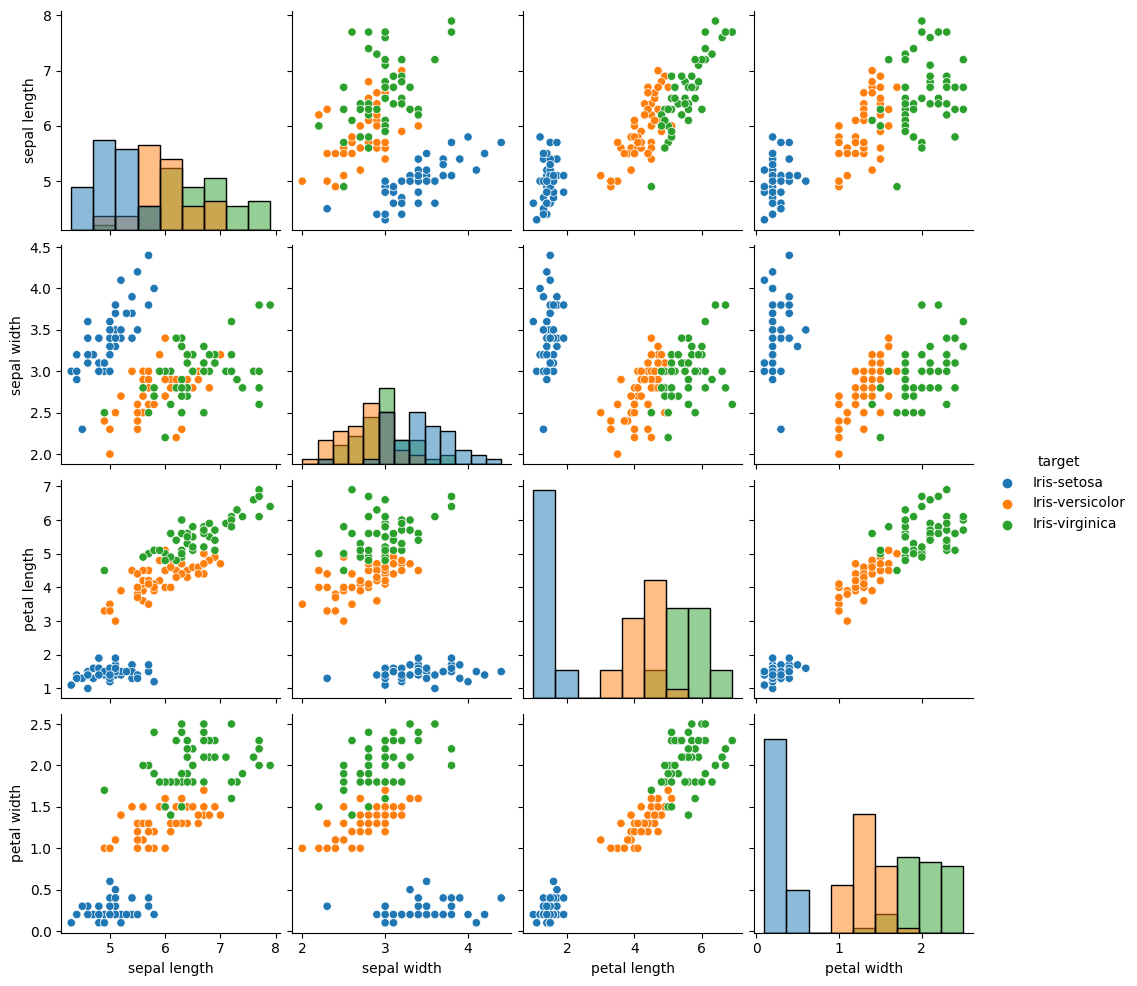

In [37]:
# 범주형 변수의 범주에 따라 다른 색상으로 나타낼 수도 있음

sns.pairplot(iris, diag_kind='hist', hue="target") # pastel, bright, deep, muted, colorblind, dark

#    kind : {'scatter', 'kde', 'hist', 'reg'}
#    diag_kind : {'auto', 'hist', 'kde', None}

plt.show()